1. Data Collection  
2. Data Validation  
3. EDA (you can even do this partly before and after feature engineering) 
4. Data Cleaning 
5. Feature Engineering 
6. Data Preprocessing 
7. Model Training  
8. Evaluation  
9. Deployment

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta


import warnings
warnings.filterwarnings("ignore")

## Reading CSV File

In [2]:
raw=pd.read_csv("Data/event_dataset.csv")

In [3]:
raw.head()

,event_id,event_type,sub_event_type,venue_city,venue_capacity,event_date,season,ticket_price,avg_past_attendance,weather,death_count,actual_attend,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,33554,Traditional Events,Dussehra,Bengaluru,27576,26-09-2023,Rainy,2067.0,21179.0,Windy,1,21251.0,NaN,NaN,NaN
1,9428,Sports,Tennis,Delhi,35574,23-01-2023,Rainy,3396.0,32830.0,Sunny,0,27473.0,NaN,NaN,NaN
2,200,Sports,Basketball,Bengaluru,35382,28-02-2024,Winter,1845.0,NaN,Cloudy,4,14549.0,NaN,NaN,NaN
3,12448,Sports,Cricket,Chennai,35605,08-04-2024,Autumn,4709.0,32300.0,Sunny,6,33270.0,NaN,NaN,NaN
4,39490,Concert,Rally,NaN,29019,24-09-2024,Summer,1572.0,8892.0,Cloudy,4,9161.0,NaN,NaN,NaN


## Basic Checks

In [4]:
df=raw.copy()

## Data Validation

In [5]:
def colvalidate(df, col):
    print(f"Column: {col}")
    print()
    print(f"Number of Unique Values in Column: {df[col].nunique()}")
    print()
    print("Unique Values:")
    for indx in range(0, df[col].nunique(), 100):
        print(df[col].unique()[indx:indx+100])
        print()
    print("Data Type of Column:", df[col].dtype)
    print()

In [6]:
colvalidate(df,"event_id")

Column: event_id

Number of Unique Values in Column: 50000

Unique Values:
[33554  9428   200 12448 39490 42725 10823 49499  4145 36959 43107 38696
  6189  1415 18472 29283 15178 34305 12610 12145  6114 15909   822 15119
 13467 26498 42112 30189 37238 33110 36481 24149  5504  3919 38479 21124
 49718 42295 47610 11077 41515 22063  9414 38341 30264 41253 14645 26336
 28103 17524 24713 40486  3851 40041 15268 49147 30002 45927 43825 17241
  4893   726 22950 34658 37214 20305 15270 22368 42685 46735 11733 18620
 48493 26804 44306 47523 32208  2531 17747  8271 15080 13625 30639 30441
 36057 42652 36804 48225 29227  5634  5988 48064  1813 27579 16824  3929
 37287 25046 15728 29601]

[10431 25769 29104 36538 39329 35540 28076 17841 27803  7683 24280 33071
 35558 37190 47150 46916  9802 38801 24670 44234 31920  7135 33705 29661
 17894 22019 13539 43119 36421  9406 13414  6721 15602 44744 31139  2730
 38243 29626 47895 42091 36400  6245  5546  4065 12852 21803 41164  6233
  3863 35095 40196 392

[37731 21887 17637 22878 28477  3092 43312 18748  3942 15744 16964 32474
 30295 21406 37762 28587 41657 27586 22435 36912 38652 33414 39849  3265
  7318 18084 16962 13102 16837 19805 25700 37232  9580 42734 38172  1230
 33135  8652  7669 44258  3177  7864  9775 48824 21727 48778  9151 12163
 37729 25986 21423 22710 17448   322 48218  7011 15571 49743 28889  3384
 10960 18081 29741 36127  8611 25504  9249  2141 37120 25782 32503 34852
  7224 28322 19691 21983 41393 37562  1531 41438  2930  5800 43970 11205
 22763  6755 23229 12903  3509 42363  5359 21844 10321 33348  9705 40286
 35747 24472 35174  7835]

[44069 42302 13682 40574 40342 20150 35899 25908 38987 29045 16169 11406
 41378 38505 30736 25625  4062 21202   299 33926 12840 35556  6282 28138
 32041 49051  2499 31864 33575 19533  1339   294 46014 45773  4073 16154
 13523 29013 30310 29020 39245 17926 29717 11627 27227 43518 44838 48383
  4917 10547 45867 18124 18377 48433 29351 42855 34690 11568  9017   381
  7714 12189 10748 41770

[10141  9603 12920  3976 33888 38702 23734 43056  9180 30857 40390 36706
  9781 16026  1179 48438 28767 35431 36906 26353 42465  5838 17830  7109
 42622 33054 24372 40160 43573 24501 17853 38369 29779 46824 46141  3049
   701 41173 29811 26440 31479  2068 44549 16013 48794 17677 22278  5920
 17541 47377 39139  4692  3284 23551  2920 45259 17069 43594 11085 22736
 34910 39847 27703 21022 17389 23140  8955 22355  5231 44053 20406 30724
 10935 30805 22864 23413 39070 44401 46496 42375  9496  7594 18867 25533
  7083  1374 37071 33195 19436 45705   340 42885 29430 46280 29474 33492
  8834 10979 38271 27550]

[  130 24978 33302  5351 49244  4790 32399  3195 31017 26244 17170 49062
 14397 36263 13150 34004 41507 29395 25601 16666  2503 22870 32751  9821
 33923  9458 33444    20 38038 35806 23730  1644 16278 42844 19988 15991
  2828 24943 16129 32159 18641 13069 30487 31108  7116 27526 48579 42527
  3801  6901 44330 24344  7895 31740 11274 44066 24891  1984 49339 10349
 25657  8850 48674 33520

### event_id does'nt affect

In [7]:
del df["event_id"]

In [8]:
df.head()

,event_type,sub_event_type,venue_city,venue_capacity,event_date,season,ticket_price,avg_past_attendance,weather,death_count,actual_attend,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,Traditional Events,Dussehra,Bengaluru,27576,26-09-2023,Rainy,2067.0,21179.0,Windy,1,21251.0,NaN,NaN,NaN
1,Sports,Tennis,Delhi,35574,23-01-2023,Rainy,3396.0,32830.0,Sunny,0,27473.0,NaN,NaN,NaN
2,Sports,Basketball,Bengaluru,35382,28-02-2024,Winter,1845.0,NaN,Cloudy,4,14549.0,NaN,NaN,NaN
3,Sports,Cricket,Chennai,35605,08-04-2024,Autumn,4709.0,32300.0,Sunny,6,33270.0,NaN,NaN,NaN
4,Concert,Rally,NaN,29019,24-09-2024,Summer,1572.0,8892.0,Cloudy,4,9161.0,NaN,NaN,NaN


In [9]:
df=df[['event_type', 'sub_event_type', 'venue_city', 'venue_capacity',
    'season', 'weather','ticket_price', 'event_date',
       'avg_past_attendance', 'actual_attend']]

In [10]:
colvalidate(df,'season')

Column: season

Number of Unique Values in Column: 4

Unique Values:
['Rainy' 'Winter' 'Autumn' 'Summer']

Data Type of Column: object



In [11]:
for col in df.columns:
    print("*****",col,"*****")
    colvalidate(df,col)

***** event_type *****
Column: event_type

Number of Unique Values in Column: 6

Unique Values:
['Traditional Events' 'Sports' 'Concert' 'Fashion Show' 'Prerelease'
 'Political']

Data Type of Column: object

***** sub_event_type *****
Column: sub_event_type

Number of Unique Values in Column: 15

Unique Values:
['Dussehra' 'Tennis' 'Basketball' 'Cricket' 'Rally' 'Classical'
 'Badminton' 'Women' 'Vinayaka Chavithi' 'Football' 'WebSeries' 'Movie'
 'Debate' 'Rock' 'Men']

Data Type of Column: object

***** venue_city *****
Column: venue_city

Number of Unique Values in Column: 6

Unique Values:
['Bengaluru' 'Delhi' 'Chennai' nan 'Mumbai' 'Hyderabad' 'Vijayawada']

Data Type of Column: object

***** venue_capacity *****
Column: venue_capacity

Number of Unique Values in Column: 31646

Unique Values:
[27576 35574 35382 35605 29019 37004 29312 30920 25796 39064 35011 19307
 32023 43560 24313 22143 15976 56485 25566 55434 19123 31926 17299 59513
 16689 36368 61384 29740 33343 23255 11014 390

[37957 47220 34255 21246 20593 23266  7722 49401 32778 23889 41339 21611
 43315 20745 58780 56098 38187 22989 15825 45100 56811 35414 16309 42743
  9758 16504 24136 66859 42165 18401 36335 28257 60404 47959 30965 20838
 30834 29138 47761 33679 12833 29294 10291 25396 24333 63864 58024 15470
 54587 50558 30742 39675 37647 64976 63473 43156 54825 42208 23573 50339
 53900 28875 27903 32561 27781 49825 32822 31324 61049 50706 55481 51392
 30589 49346 40157 50786 15228 23649 40082 12766 61370 60794 23432 48396
 35099 36521 56504 36477 44237 30168 30948 43118 19430 38481 47480 12603
 32749 37407 40769 49257]

[ 8976 11625 21735 29768 21978 63376 21813 22974 57832 29043 33604 62394
  6232 29672 24963 35290 55816 16987 54348 48152 15538 45788 58641 10661
 15372 23595 48727 45726 32629 34682 34645 37595 12402 42657 46586 25920
 23787 44114 19298 27500 65876 52303 54444 62045 48123 47021 27506 36144
 34194 17243 57873 13382 17039 59861 33065 32120 36654 10354 29613 28406
 25703 40505  7236 29133

[10387. 33812. 16069. 56628. 35477.  9392. 15406.  8781. 14922. 17264.
 19754. 38017. 19615. 33210. 12477. 16929. 33747. 29333. 39619. 24701.
 30110. 50689.  9311. 24445. 20438. 13242. 16430. 14781. 44195. 36276.
 14079.  6786. 11173. 28603. 17659. 14160. 21886.  4412. 38365. 38288.
 13167. 14054. 17976. 22642. 39344. 44888. 10590. 22579. 20159. 14366.
 43807. 16774. 30140.  9526. 30820.  9728. 17893. 19314. 22030. 28035.
 13994. 37340. 21344. 37307.  8957. 21591. 23262. 25500. 39251. 30879.
 16690. 15323. 27246. 26078. 13939. 12664. 21499.  5899.  5079. 14448.
 18255. 20603. 29323. 16375. 19413. 26510. 24738. 42653. 12145.  9970.
 16724. 15736.  4287. 10271. 22487.  6945.  8091. 24410. 40214. 14217.]

[26681. 13804. 22035. 22521.  9116.  2253.  7292. 26668. 31333. 16578.
 21284. 11040. 17648. 21420.  9217. 16756. 24384. 27618. 10554. 12375.
 12393. 11331. 27520. 42450. 20523. 16795. 10898. 10003. 12391. 30194.
 10849. 23950. 17130. 12931. 32943. 18722. 33561. 10854. 15271.  7438.
 318

[20529. 48130. 34147. 29716. 20273.  8228. 32365. 22337. 24579. 11531.
 19281. 31423. 20822. 14644. 32226. 21451.  6576. 41289. 19999.  9150.
 20355. 42624. 12483. 23298. 27785.  5621. 27269. 34034. 36178. 12689.
 32431. 51676.  7129. 27035. 15922.  4273. 23545. 14076. 29640. 39728.
 14970. 29897. 22261. 21893. 41456. 11713. 34909. 35023. 24984.  6754.
 35064.  4992. 28485. 11615. 10508. 32049. 17174. 51893. 44712.  8655.
 25285. 45901.  8145. 23276. 21453. 31893. 27948. 17980. 31318. 10523.
 26378. 34497.  6424. 19461.  6779. 22438. 25826. 60542. 17137. 18353.
 19731. 18330. 15790. 22204. 41099.  8726. 26861. 33412. 11095. 31104.
 16621. 13507. 15020. 19564. 24580. 16573. 15954.  5193. 37074. 16189.]

[14828. 22574. 27724.  3283. 14061.  9327. 38743.  6901. 21983. 26490.
 11817. 23575.  2671. 38954. 23654. 12613. 34172. 18713. 15546.  4850.
 35376. 28495. 30048. 11762. 20550. 18770. 18419. 40047. 19123. 16464.
 49789. 17052. 11368. 21963. 22812. 17711. 35103. 29991. 32690. 54643.
 196

[ 9601. 17427. 27101. 32814. 37180. 22275. 24796. 14242. 12295. 14041.
 56771.  9252. 16890. 16028. 10608.  4103. 20012.  7262. 34422. 23007.
  7090. 10138. 11972.  8500. 25931.  8367. 17972. 29051. 20564.  4763.
  5139. 35491.  9710. 17426. 26015. 14455. 11274. 25505. 31812.  6207.
 10978. 29758.  7404. 13138. 26461. 21581.  8094.  4830.  7202.  2941.
 16113. 56833. 21212. 32276.  8384. 13998.  6321. 36577. 13627.  8779.
 32703.  9966. 15171.  9713. 37504.  8600. 22782. 16221. 10629. 19161.
  8278. 12629. 12873. 24593. 24556.  5394. 22647. 21850.  7021. 20767.
 30631. 19837. 20110. 16097. 13253.  6487. 15508. 16464. 24934. 26785.
 33806. 27106.  3285.  7572. 32209. 44318. 20331. 40862. 10290. 15901.]

[ 8727. 15500. 28923. 25335. 16232. 21253. 28548. 50402. 54892.  9900.
 16797. 21802. 20990. 13379. 27518.  1875. 37342. 27138. 19085.  7105.
 49175. 18638. 11780. 22533. 21601. 10886. 29472.  7246. 17685.  4989.
  5867. 39864. 27722. 18999.  5460. 13884. 40234. 35855. 26670. 20238.
  72

[40701.  3740.  2552. 10519. 23857. 24711. 17509. 34034. 27271. 28116.
 28247. 47922. 18161. 13392. 38526. 15388. 33324. 23367. 14574. 25740.
 14489. 26086.  6930. 30386. 19190. 22286. 19910. 39745. 28088. 20434.
 14926. 13319. 11158. 35748. 28606.  7481. 17453. 14606. 13910. 10792.
 27584. 17839. 21255. 14931. 35405.  8167. 24102. 11353. 14876.  7996.
 26350.  7703. 19860. 16865.  6898.  4533. 28574. 11909. 17898. 16448.
  8247. 25380.  7960. 23837.  9801. 19987.  3372. 22154.  2005. 20922.
 28052. 19601. 28096. 35702. 23478. 28112. 22990. 12695. 16810. 13731.
 34391. 24450.  5493. 36119.  2191. 27588. 40388. 17042. 17341.  1688.
  6950. 25136.  6050. 19124. 21244. 24277. 10569.  9155. 32462. 19606.]

[12228. 17981. 26329. 47233. 25716. 19353. 18201. 39428. 19508.  7096.
 17156. 58738. 11615.  4728. 11632. 10965. 29150.  2753. 37186. 14021.
  3226. 25275.  7633. 36584. 46508. 16600. 26736. 35419. 23354. 16647.
 52311. 13126. 15601. 15341. 20772. 24807. 19578. 39305. 36983. 27914.
 122

[ 1736. 16276. 32728. 13845. 24715. 21482. 25098.  6688. 29813. 45681.
 34524. 31654.  3347. 28131. 10947. 26157. 23550. 23865. 23418. 13381.
 32289. 24003. 35853. 34025. 29621. 11022. 31732. 27834. 17539. 12151.
 27889. 34718. 12079. 30268.  9614. 22912. 25758.  6154. 21434. 28709.
 41541. 12324. 27381.  5535. 12817. 19011.  7357. 19899. 15077. 14744.
 11025. 38530. 35809. 46922. 28892. 17191. 21466. 32228. 22085. 17023.
 15097.  3501. 37456.  4476. 34959. 38221. 21399.  6907. 51300. 13765.
 57160.  9950. 21788. 50084.  8570. 21617. 32630. 19797. 33868. 28448.
 31036.  7908. 24657. 10030. 15533. 12580. 39390. 12405. 31727. 20071.
 23322. 19541. 31946. 22206. 12202. 13077.  6382. 30075. 17939. 23650.]

[26770. 23576. 17570.  5982.  6524.  5538. 52628. 22661. 22017. 30168.
 21233. 30637. 22617. 16720. 18877. 30836. 44068. 55683. 44287. 56798.
 40554.  7824. 15970. 30057. 29366.  5618. 39632. 20930. 15059. 12551.
 10540.  5820. 15945. 29942.  8252. 11372. 12038.  6246.  9927. 26571.
 297

In [12]:
df.head()

,event_type,sub_event_type,venue_city,venue_capacity,season,weather,ticket_price,event_date,avg_past_attendance,actual_attend
0,Traditional Events,Dussehra,Bengaluru,27576,Rainy,Windy,2067.0,26-09-2023,21179.0,21251.0
1,Sports,Tennis,Delhi,35574,Rainy,Sunny,3396.0,23-01-2023,32830.0,27473.0
2,Sports,Basketball,Bengaluru,35382,Winter,Cloudy,1845.0,28-02-2024,NaN,14549.0
3,Sports,Cricket,Chennai,35605,Autumn,Sunny,4709.0,08-04-2024,32300.0,33270.0
4,Concert,Rally,NaN,29019,Summer,Cloudy,1572.0,24-09-2024,8892.0,9161.0


### Converting Rows to LowerCase

In [13]:
for col in df.columns:
    if df[col].dtype==object:
        df[col]=df[col].str.lower()

In [14]:
df.head()

,event_type,sub_event_type,venue_city,venue_capacity,season,weather,ticket_price,event_date,avg_past_attendance,actual_attend
0,traditional events,dussehra,bengaluru,27576,rainy,windy,2067.0,26-09-2023,21179.0,21251.0
1,sports,tennis,delhi,35574,rainy,sunny,3396.0,23-01-2023,32830.0,27473.0
2,sports,basketball,bengaluru,35382,winter,cloudy,1845.0,28-02-2024,NaN,14549.0
3,sports,cricket,chennai,35605,autumn,sunny,4709.0,08-04-2024,32300.0,33270.0
4,concert,rally,NaN,29019,summer,cloudy,1572.0,24-09-2024,8892.0,9161.0


## Duplicated Handling

### Checking for Duplicates

In [15]:
df[df.duplicated()]

,event_type,sub_event_type,venue_city,venue_capacity,season,weather,ticket_price,event_date,avg_past_attendance,actual_attend


In [16]:
df.head()

,event_type,sub_event_type,venue_city,venue_capacity,season,weather,ticket_price,event_date,avg_past_attendance,actual_attend
0,traditional events,dussehra,bengaluru,27576,rainy,windy,2067.0,26-09-2023,21179.0,21251.0
1,sports,tennis,delhi,35574,rainy,sunny,3396.0,23-01-2023,32830.0,27473.0
2,sports,basketball,bengaluru,35382,winter,cloudy,1845.0,28-02-2024,NaN,14549.0
3,sports,cricket,chennai,35605,autumn,sunny,4709.0,08-04-2024,32300.0,33270.0
4,concert,rally,NaN,29019,summer,cloudy,1572.0,24-09-2024,8892.0,9161.0


# EDA

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
def cstudy(col):
    print("Number of Categories/Classes in column:",df[col].nunique())
    print("Category Names:",df[col].unique())
    print("Value Counts (FD) of each Category:",df[col].value_counts())
    print("Mode:",df[col].mode()[0])

    # Frequency of each category
    event_counts = df[col].value_counts()
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="viridis")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()
    # Plot pie chart
    plt.figure(figsize=(6,6))
    plt.pie(
        event_counts,
        labels=event_counts.index,
        autopct='%1.1f%%',     # show percentages
        startangle=90,         # rotate chart for better view
    
    )
    plt.title(f"Distribution of {col}")
    plt.show()
def nstudy(col):
    print("Mean:",round(df[col].mean()))    
    print("Median:",round(df[col].median()))
    print("Mode:",round(df[col].mode()[0]))
    print("Range:",df[col].max()-df[col].min())
    print("Variance:",round(df[col].var()))
    print("Standard Deviation:",round(df[col].std()))
    print("Five Number Summary:",round(df[col].describe())[['min','25%','50%','75%','max']])
    print("Measures of Symmetry")
    print("Skewness:",round(df[col].skew(),2))
    print("Kurtosis:",round(df[col].kurt(),2))
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, bins=30, color='teal')
    plt.title(f"Distribution of {col}")
    plt.show()
    plt.figure(figsize=(4, 3))
    sns.distplot(df[col])
    plt.show()
    print()
    
def datestudy(col):
    print("Minimum Date:", df[col].min())
    print("Maximum Date:", df[col].max())
    print("Date Range:", df[col].max() - df[col].min())
    
    print("Date Wise Frequency:")
    print(df[col].value_counts())
    print()


## Uni-Variate Analysis- Study of Single Column Data

Number of Categories/Classes in column: 6
Category Names: ['traditional events' 'sports' 'concert' 'fashion show' 'prerelease'
 'political']
Value Counts (FD) of each Category: sports                12500
prerelease            10000
political              9000
traditional events     7500
concert                6000
fashion show           5000
Name: event_type, dtype: int64
Mode: sports


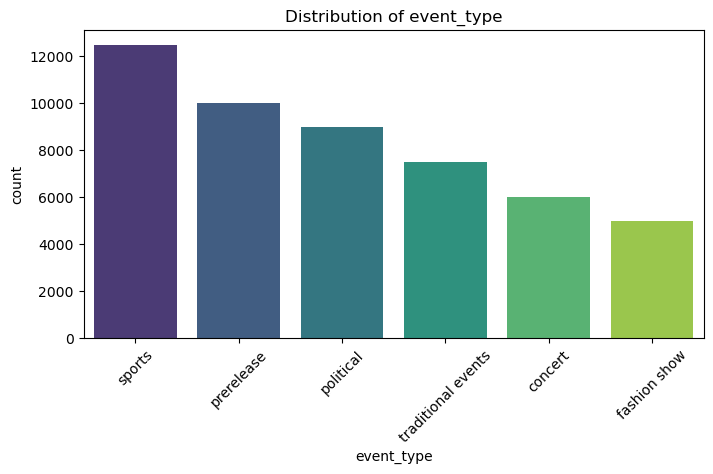

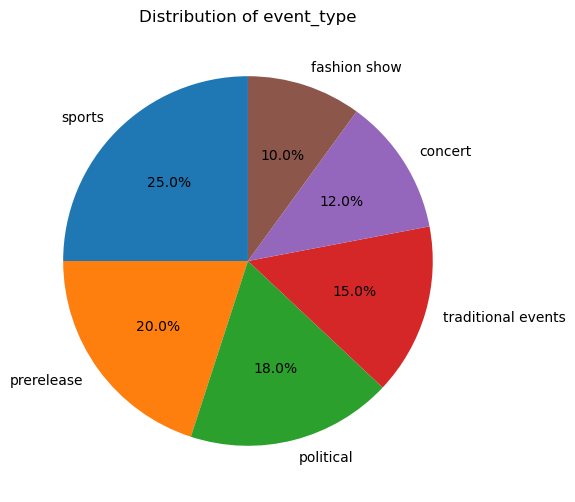

Number of Categories/Classes in column: 15
Category Names: ['dussehra' 'tennis' 'basketball' 'cricket' 'rally' 'classical'
 'badminton' 'women' 'vinayaka chavithi' 'football' 'webseries' 'movie'
 'debate' 'rock' 'men']
Value Counts (FD) of each Category: movie                4997
webseries            4929
rally                4623
debate               4396
vinayaka chavithi    3837
dussehra             3639
rock                 3093
classical            2917
cricket              2773
women                2523
tennis               2485
football             2482
men                  2480
badminton            2423
basketball           2403
Name: sub_event_type, dtype: int64
Mode: movie


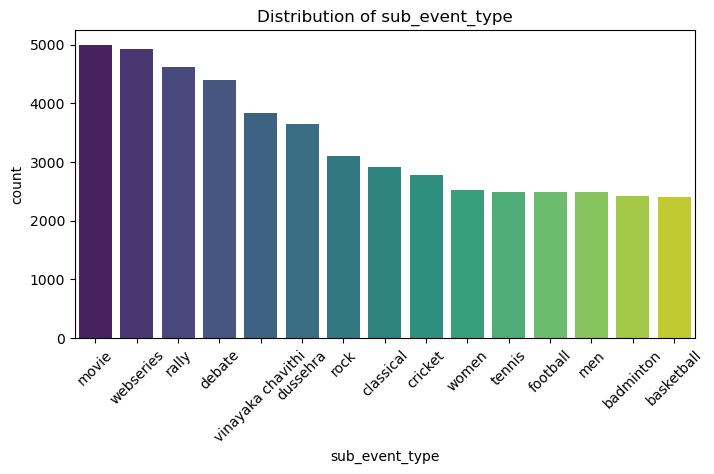

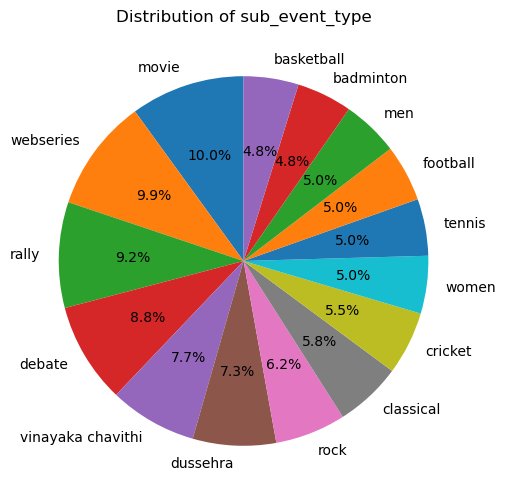

Number of Categories/Classes in column: 6
Category Names: ['bengaluru' 'delhi' 'chennai' nan 'mumbai' 'hyderabad' 'vijayawada']
Value Counts (FD) of each Category: hyderabad     11523
mumbai         9330
delhi          8271
bengaluru      6930
chennai        5441
vijayawada     4684
Name: venue_city, dtype: int64
Mode: hyderabad


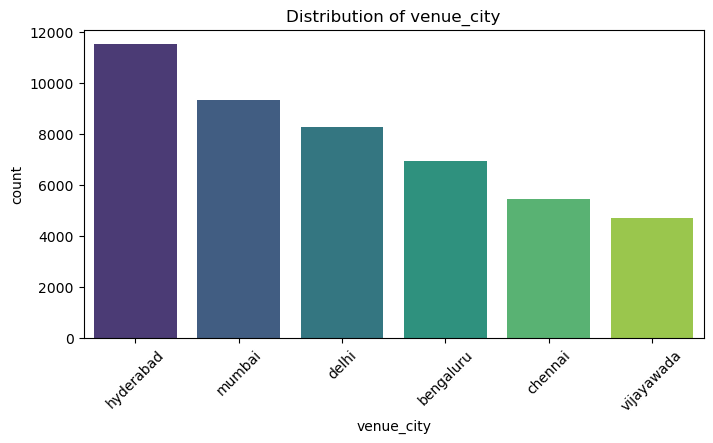

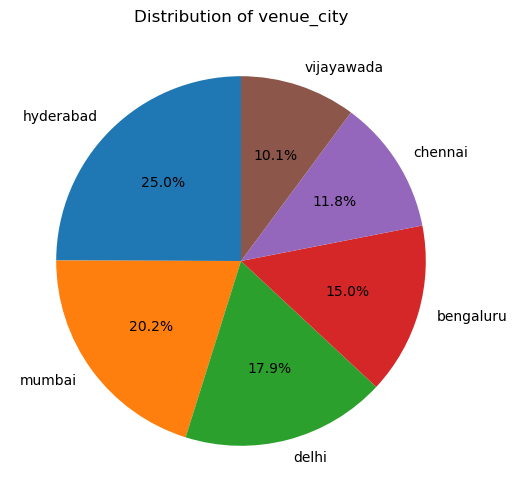

Number of Categories/Classes in column: 4
Category Names: ['rainy' 'winter' 'autumn' 'summer']
Value Counts (FD) of each Category: summer    17556
winter    15002
rainy     12559
autumn     4883
Name: season, dtype: int64
Mode: summer


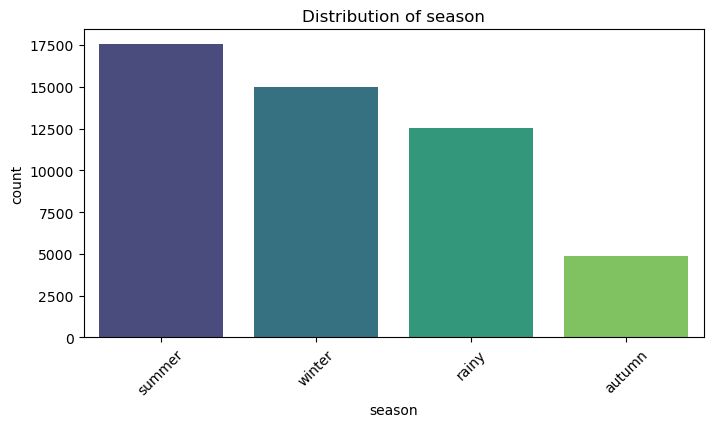

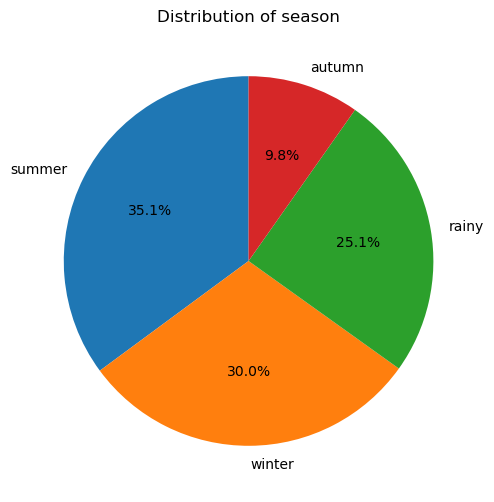

Number of Categories/Classes in column: 5
Category Names: ['windy' 'sunny' 'cloudy' 'stormy' 'rainy']
Value Counts (FD) of each Category: sunny     19994
cloudy    12464
rainy     10021
windy      4957
stormy     2564
Name: weather, dtype: int64
Mode: sunny


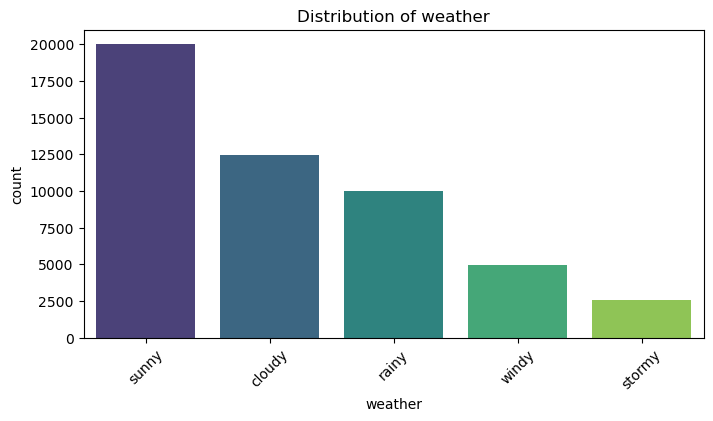

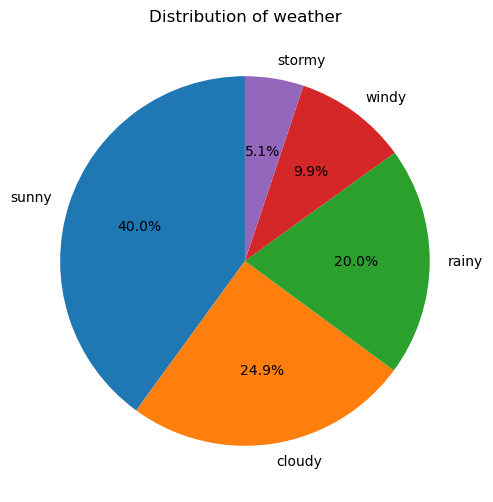

In [20]:
for col in df.columns:
    # For categorical (object) columns
    if col=='event_date':
        break
    elif df[col].dtype == 'object':
        cstudy(col)

   The dataset contains key categorical features such as event_type, sub_event_type, venue_city, season, and weather. The distribution indicates that the data is well-spread across categories, with slight dominance in certain classes.

#### Event Type Distribution
- The dataset consists of 6 event types, with Sports events being the most frequent (12,500 records).
- Least represented category is Fashion Show with 5,000 records.
- The class distribution shows a mild imbalance, which is acceptable for model training.

#### Sub-Event Type Distribution
- There are 15 sub-event categories, offering high diversity.
- Most common sub-events include Movie (4,997), Webseries (4,929) and Rally (4,623).
- Least common sub-events include Basketball (2,403) and Badminton (2,423).

#### Venue City Distribution
- Data covers 6 major Indian cities.
- Hyderabad, Mumbai, and Delhi contribute the most data, with Hyderabad being the highest (11,523).
- Minimal missing values were observed and later handled during data cleaning.

#### Season & Weather Distribution
- Majority of events occurred in Summer (17,556) and Winter (15,002) seasons.
- Weather is dominated by Sunny (19,994) conditions, followed by Cloudy and Rainy.
- Less number of events were held during Stormy conditions, which is realistic.

## Insights
- Sports and Entertainment events dominate the dataset, indicating high public interest.
- Attendance is strongly influenced by season and weather—fewer events recorded during stormy and autumn periods.
- Cities with larger stadiums and population densities (Hyderabad, Mumbai, Delhi) recorded maximum events.
- Attendance shows high variance and a long tail distribution, suggesting the need for robust models like Random Forest or Gradient Boosting.

Mean: 33393
Median: 31846
Mode: 19792
Range: 64704
Variance: 183232073
Standard Deviation: 13536
Five Number Summary: min     5143.0
25%    23109.0
50%    31846.0
75%    42933.0
max    69847.0
Name: venue_capacity, dtype: float64
Measures of Symmetry
Skewness: 0.34
Kurtosis: -0.61


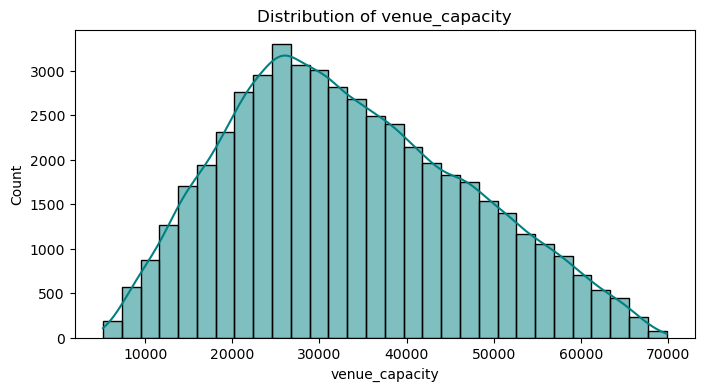

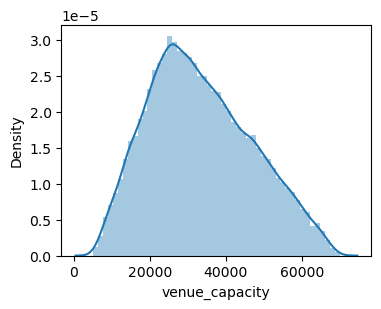


Mean: 2500
Median: 2407
Mode: 2174
Range: 4478.0
Variance: 878527
Standard Deviation: 937
Five Number Summary: min     506.0
25%    1796.0
50%    2407.0
75%    3157.0
max    4984.0
Name: ticket_price, dtype: float64
Measures of Symmetry
Skewness: 0.31
Kurtosis: -0.6


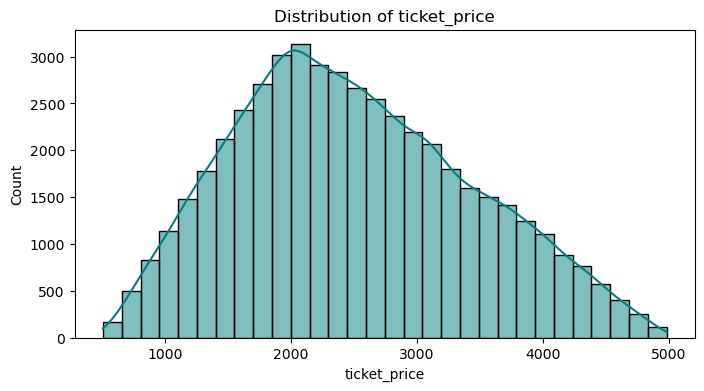

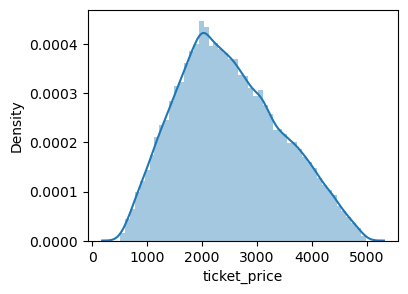


Mean: 20853
Median: 18847
Mode: 17548
Range: 63104.0
Variance: 117162169
Standard Deviation: 10824
Five Number Summary: min     1683.0
25%    12627.0
50%    18847.0
75%    27101.0
max    64787.0
Name: avg_past_attendance, dtype: float64
Measures of Symmetry
Skewness: 0.84
Kurtosis: 0.38


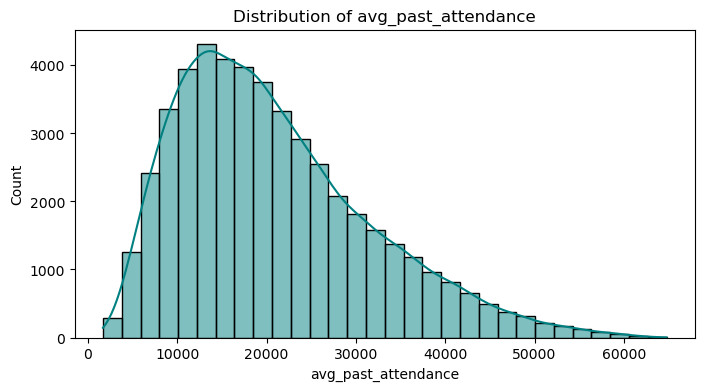

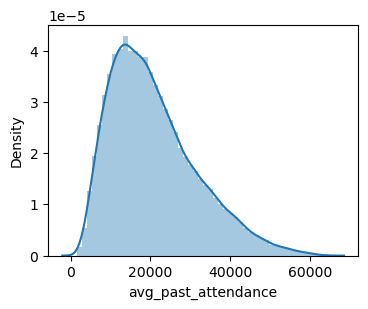


Mean: 19101
Median: 17028
Mode: 11223
Range: 68997.0
Variance: 112151924
Standard Deviation: 10590
Five Number Summary: min        0.0
25%    11096.0
50%    17028.0
75%    25095.0
max    68997.0
Name: actual_attend, dtype: float64
Measures of Symmetry
Skewness: 0.94
Kurtosis: 0.73


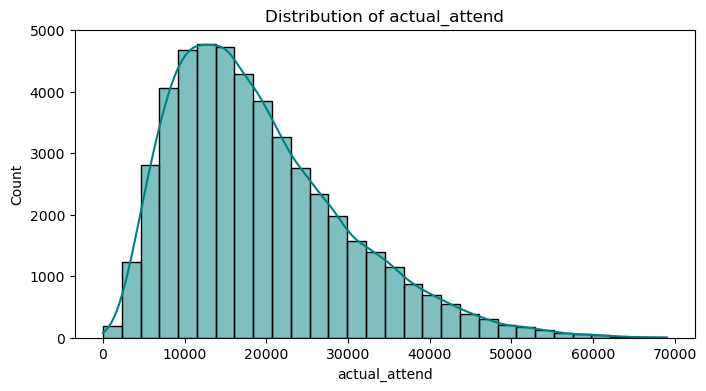

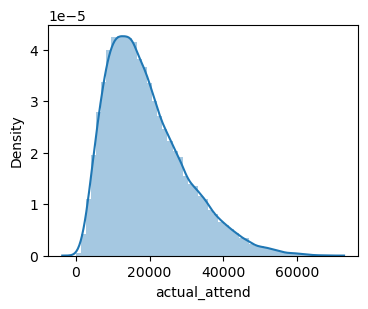

In [21]:
for col in df.columns:
    if df[col].dtype != 'datetime64[ns]' and df[col].dtype != 'object':
        nstudy(col)

## Key Observations:
- All numerical variables show a right-skewed distribution, indicating that most events have moderate attendance/capacity, while few large-scale events have unusually high numbers.
- Ticket price distribution is fairly close to normal, making it suitable for direct feature scaling.
- Outliers are present in attendance-related fields, which were retained considering real-world behavior of event popularity.

## Bi-Variate Analysis- Study of Two Columns Data

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def bivariate_analysis(df, target_col,
                       categorical_cols=None,
                       numerical_cols=None,
                       date_col=None):
    """
    Automated Bivariate EDA:
    - Categorical vs Target (Bar & Box Plots)
    - Numerical vs Target (Scatter + Regression)
    - Optional: Date vs Target (if date_col provided)
    
    Shows plots inline only.
    """
    print(" Starting Bivariate Analysis...\n")
    plt.style.use('default')

    # Detect categorical & numerical if not provided
    if categorical_cols is None:
        categorical_cols = df.select_dtypes(include=['object','category']).columns.tolist()
        if target_col in categorical_cols:
            categorical_cols.remove(target_col)

    if numerical_cols is None:
        numerical_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
        if target_col in numerical_cols:
            numerical_cols.remove(target_col)

    # ----- 1️⃣ Categorical vs Target -----
    print(" Categorical Features vs Target")
    for col in categorical_cols:
        print(f"\n➡ {col} vs {target_col}")

        # Bar plot: mean target per category
        plt.figure(figsize=(8,4))
        df.groupby(col)[target_col].mean().sort_values().plot(kind='bar')
        plt.title(f"Mean {target_col} by {col}")
        plt.ylabel(f"Mean {target_col}")
        plt.xlabel(col)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # Box plot
        plt.figure(figsize=(6,4))
        sns.boxplot(x=col, y=target_col, data=df)
        plt.title(f"{target_col} Distribution by {col}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    # ----- 2️⃣ Numerical vs Target -----
    print("\n Numerical Features vs Target")
    for col in numerical_cols:
        print(f"\n➡ {col} vs {target_col}")

        # Scatter + regression line
        plt.figure(figsize=(6,4))
        sns.regplot(x=col, y=target_col, data=df)
        plt.title(f"{target_col} vs {col}")
        plt.tight_layout()
        plt.show()

        # Correlation
        corr = df[[col, target_col]].corr().iloc[0,1]
        print(f"Correlation with {target_col}: {corr:.3f}")

 Starting Bivariate Analysis...

 Categorical Features vs Target

➡ event_type vs actual_attend


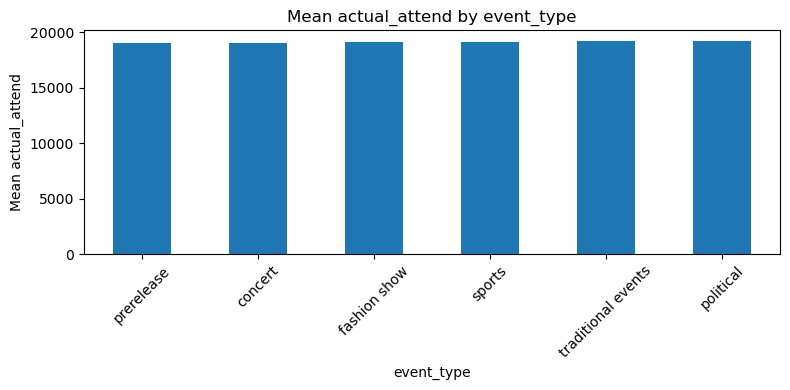

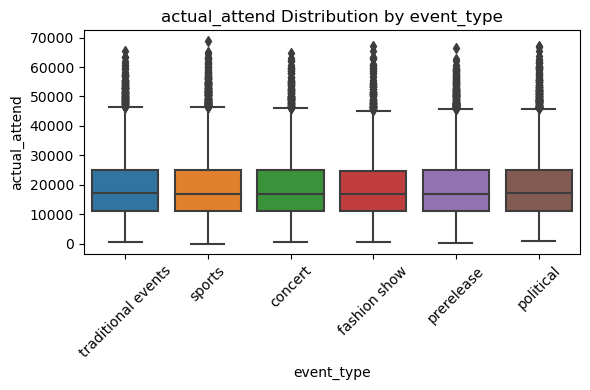


➡ sub_event_type vs actual_attend


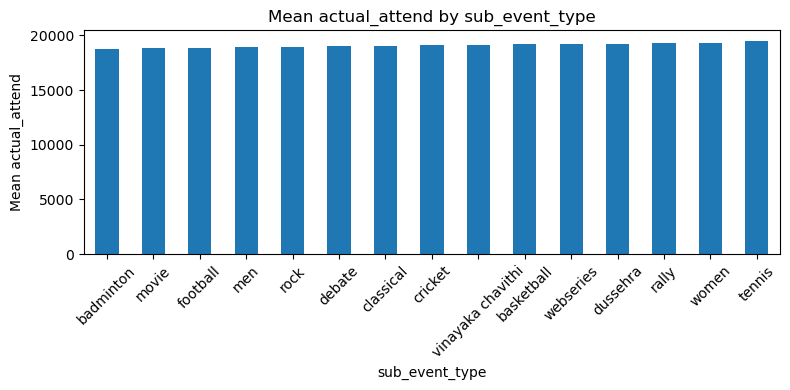

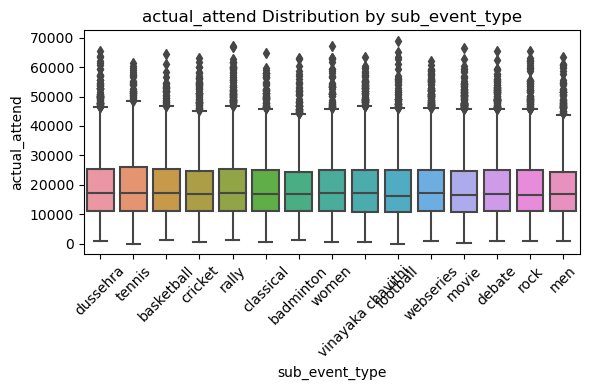


➡ venue_city vs actual_attend


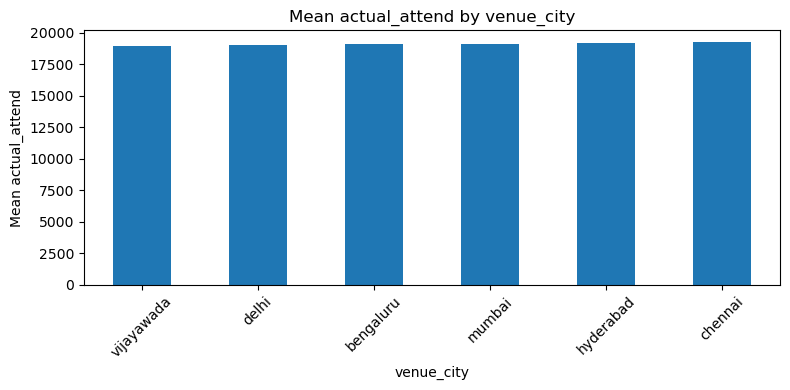

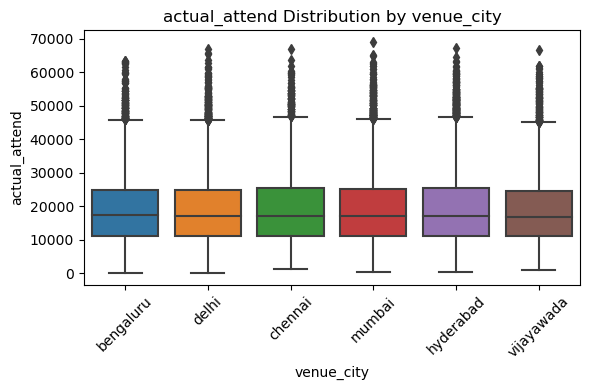


➡ season vs actual_attend


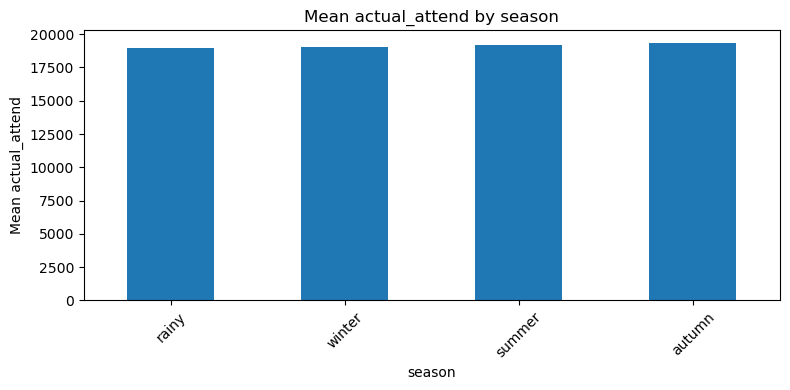

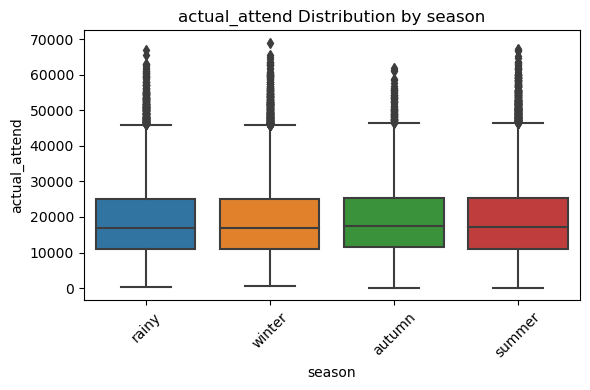


➡ weather vs actual_attend


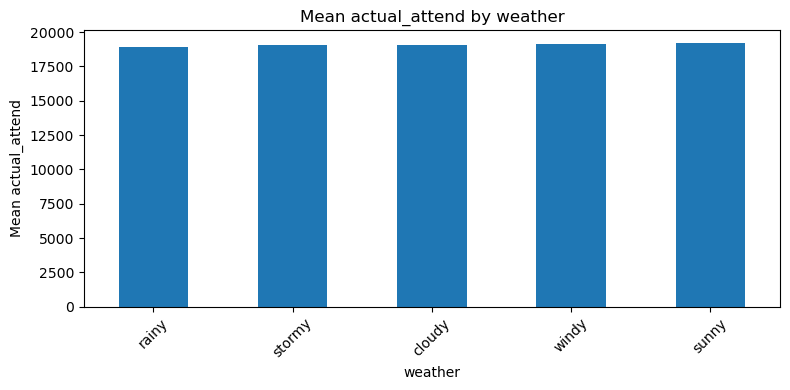

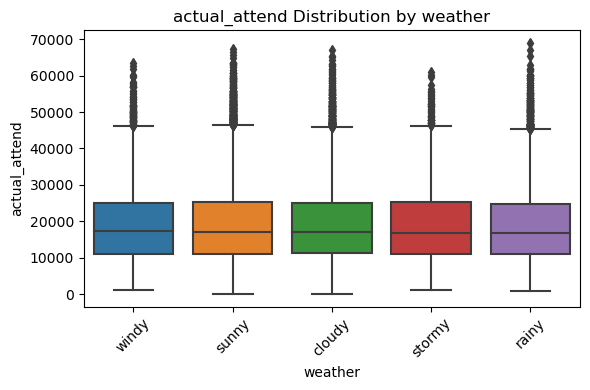


 Numerical Features vs Target

➡ venue_capacity vs actual_attend


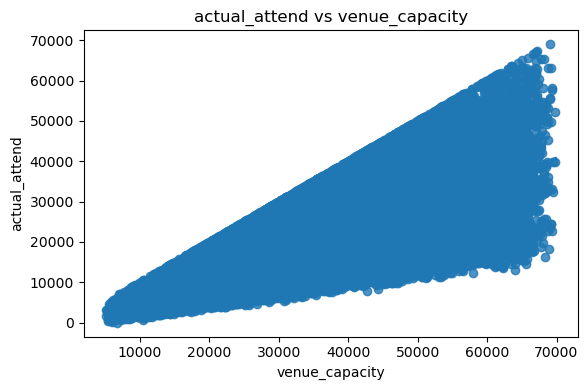

Correlation with actual_attend: 0.756

➡ ticket_price vs actual_attend


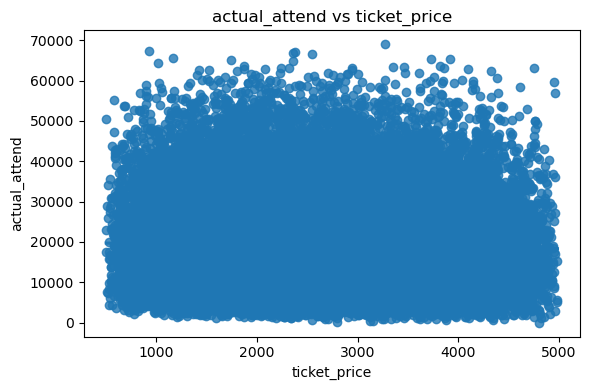

Correlation with actual_attend: -0.028

➡ avg_past_attendance vs actual_attend


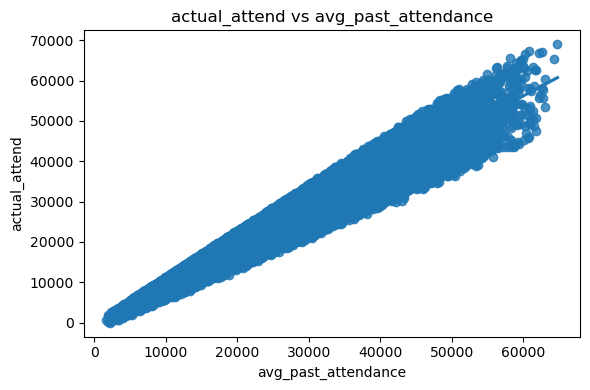

Correlation with actual_attend: 0.967


In [23]:
bivariate_analysis(
    df,
    target_col='actual_attend',
    categorical_cols=['event_type','sub_event_type','venue_city','season','weather'],
    numerical_cols=['venue_capacity','ticket_price','avg_past_attendance']
)


## Categorical vs Attendance
- Mean attendance was found to be consistent across all event types, with prerelease events showing slightly higher attendance on average.
- Sub-event-wise analysis revealed Tennis, Women, and Rally events attract the highest mean attendance, whereas indoor or niche activities show slightly lower attendance.
- Attendance variation across cities is minor, but Chennai and Hyderabad show marginally higher mean participation.

### **Season & Weather Impact**
- Attendance remains relatively stable across seasons; however, Autumn events show the highest mean attendance.
- Weather had minimal influence on attendance fluctuations, though Sunny and Cloudy conditions saw slightly higher turnout.

## Numerical vs Attendance
A correlation-based study was carried out for key numerical features:
- The scatter plots show a clear linear upward trend for venue_capacity and avg_past_attendance, confirming their influence.
- Ticket price does not significantly influence audience turnout, indicating that people attend events irrespective of pricing, especially for high-interest events.

## Key Observations:
- Ticket price has negligible influence on attendance, suggesting content and event type matter more than cost.

## Null Values Handling

In [24]:
df.isna().sum()

event_type                0
sub_event_type            0
venue_city             3821
venue_capacity            0
season                    0
weather                   0
ticket_price           1500
event_date                0
avg_past_attendance    1500
actual_attend          1500
dtype: int64

### Filling Null Values

In [25]:
# For numeric columns
df['ticket_price'].fillna(df['ticket_price'].median(), inplace=True)
df['avg_past_attendance'].fillna(df['avg_past_attendance'].median(), inplace=True)

# For categorical columns
df['venue_city'].fillna(df['venue_city'].mode()[0], inplace=True)


In [26]:
df = df.dropna(subset=['actual_attend'])

In [27]:
df.isna().sum()

event_type             0
sub_event_type         0
venue_city             0
venue_capacity         0
season                 0
weather                0
ticket_price           0
event_date             0
avg_past_attendance    0
actual_attend          0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48500 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   event_type           48500 non-null  object 
 1   sub_event_type       48500 non-null  object 
 2   venue_city           48500 non-null  object 
 3   venue_capacity       48500 non-null  int64  
 4   season               48500 non-null  object 
 5   weather              48500 non-null  object 
 6   ticket_price         48500 non-null  float64
 7   event_date           48500 non-null  object 
 8   avg_past_attendance  48500 non-null  float64
 9   actual_attend        48500 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 4.1+ MB


## Checking for Correlation

In [29]:
import pandas as pd

# Assuming your dataframe is named df
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix)

                     venue_capacity  ticket_price  avg_past_attendance  \
venue_capacity             1.000000     -0.000037             0.770162   
ticket_price              -0.000037      1.000000            -0.004851   
avg_past_attendance        0.770162     -0.004851             1.000000   
actual_attend              0.755866     -0.027295             0.952291   

                     actual_attend  
venue_capacity            0.755866  
ticket_price             -0.027295  
avg_past_attendance       0.952291  
actual_attend             1.000000  


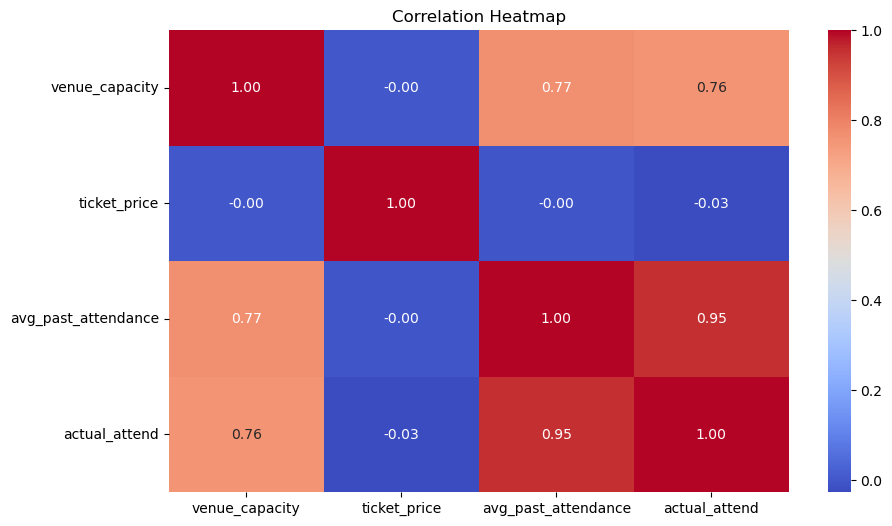

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## Feature Engineering

### Extracting Weekday and Month Name from event_date

In [31]:
# Ensure event_date is in datetime format
df['event_date'] = pd.to_datetime(df['event_date'])

# Create two separate columns
df['weekday'] = df['event_date'].dt.strftime('%A')   # Full weekday name
df['month'] = df['event_date'].dt.strftime('%B')     # Full month name
import pandas as pd

# Create is_holiday (1 if Sat/Sun, 0 otherwise)
#df['is_holiday'] = df['event_date'].dt.dayofweek.apply(lambda x: 1 if x >= 5 else 0)

# Optional: if you also want is_weekend (same as is_holiday)
#df['is_weekend'] = df['is_holiday']

### Extracting Holiday and Weekend from event_date

In [32]:
# Create is_holiday (1 if Sat/Sun, 0 otherwise)
df['is_holiday'] = df['event_date'].dt.dayofweek.apply(lambda x: 1 if x >= 5 else 0)

# Optional: if you also want is_weekend (same as is_holiday)
df['is_weekend'] = df['is_holiday']

In [33]:
df.head()

,event_type,sub_event_type,venue_city,venue_capacity,season,weather,ticket_price,event_date,avg_past_attendance,actual_attend,weekday,month,is_holiday,is_weekend
0,traditional events,dussehra,bengaluru,27576,rainy,windy,2067.0,2023-09-26,21179.0,21251.0,Tuesday,September,0,0
1,sports,tennis,delhi,35574,rainy,sunny,3396.0,2023-01-23,32830.0,27473.0,Monday,January,0,0
2,sports,basketball,bengaluru,35382,winter,cloudy,1845.0,2024-02-28,18847.0,14549.0,Wednesday,February,0,0
3,sports,cricket,chennai,35605,autumn,sunny,4709.0,2024-08-04,32300.0,33270.0,Sunday,August,1,1
4,concert,rally,hyderabad,29019,summer,cloudy,1572.0,2024-09-24,8892.0,9161.0,Tuesday,September,0,0


### event_date does'nt affect

In [34]:
del df['event_date']

In [35]:
df=df[['event_type', 'sub_event_type', 'venue_city', 'venue_capacity',
    'season', 'weather','ticket_price','weekday', 'month','is_holiday','is_weekend',
       'avg_past_attendance', 'actual_attend']]

In [36]:
for col in df.columns:
    if df[col].dtype==object:
        df[col]=df[col].str.lower()

In [37]:
df['ticket_price'] = df['ticket_price'].round(0).astype(int)
df['avg_past_attendance'] = df['avg_past_attendance'].astype(int)
df['venue_capacity'] = df['venue_capacity'].astype(int)
df['actual_attend']=df['actual_attend'].astype(int)

In [38]:
df.head()

,event_type,sub_event_type,venue_city,venue_capacity,season,weather,ticket_price,weekday,month,is_holiday,is_weekend,avg_past_attendance,actual_attend
0,traditional events,dussehra,bengaluru,27576,rainy,windy,2067,tuesday,september,0,0,21179,21251
1,sports,tennis,delhi,35574,rainy,sunny,3396,monday,january,0,0,32830,27473
2,sports,basketball,bengaluru,35382,winter,cloudy,1845,wednesday,february,0,0,18847,14549
3,sports,cricket,chennai,35605,autumn,sunny,4709,sunday,august,1,1,32300,33270
4,concert,rally,hyderabad,29019,summer,cloudy,1572,tuesday,september,0,0,8892,9161


## Data Preprocessing

## Checking for Outliers

In [39]:
num=df.select_dtypes(include='number')

In [40]:
def outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]

    print(f"{col}: {outlier_count} outliers")

    import seaborn as sns
    import matplotlib.pyplot as plt

    # Plot Boxplot
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Outliers in {col}')
    plt.xlabel(col)
    plt.show()


venue_capacity: 0 outliers


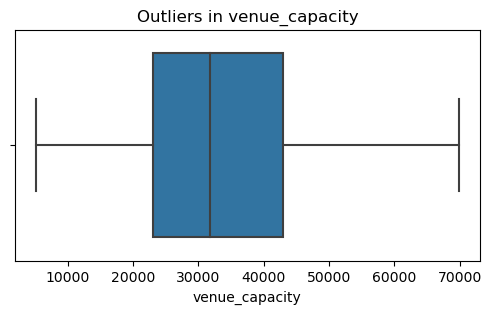

ticket_price: 0 outliers


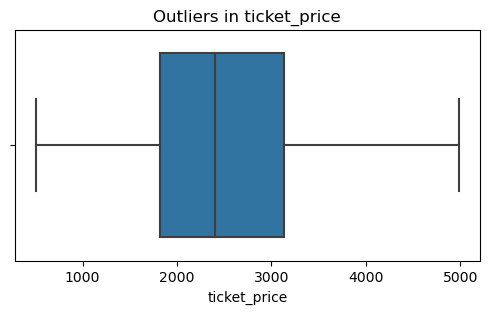

is_holiday: 0 outliers


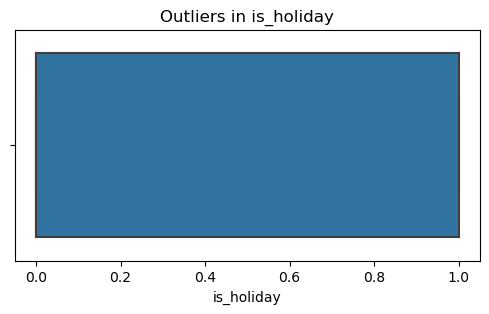

is_weekend: 0 outliers


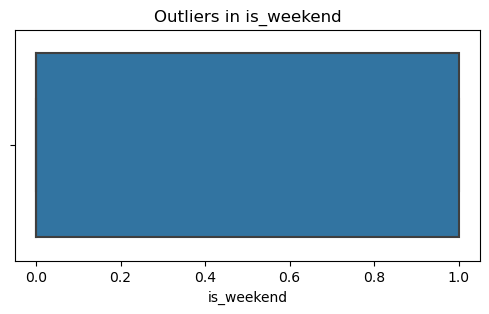

avg_past_attendance: 974 outliers


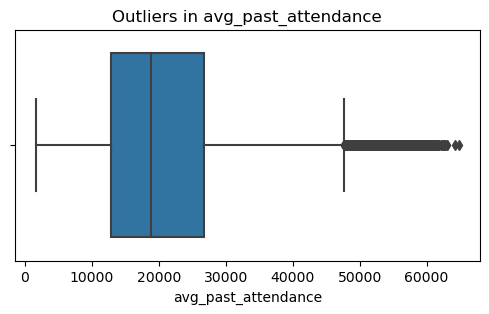

actual_attend: 963 outliers


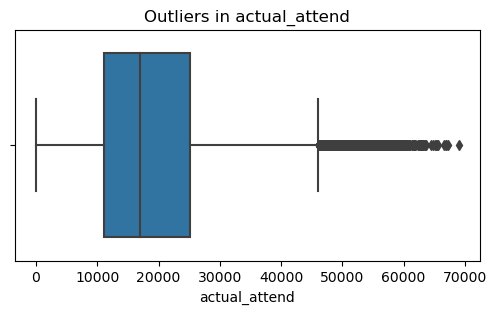

In [41]:
for col in num.columns:
    outliers(col)

In [42]:
import numpy as np

# Calculate IQR (Interquartile Range)
Q1 = df['avg_past_attendance'].quantile(0.25)
Q3 = df['avg_past_attendance'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)


Lower Bound: -8128.875
Upper Bound: 47700.125


In [43]:
df['avg_past_attendance'] = np.where(
    df['avg_past_attendance'] < lower_bound, lower_bound,
    np.where(df['avg_past_attendance'] > upper_bound, upper_bound, df['avg_past_attendance'])
)

In [44]:
# Check if any values are below the lower bound
below_lower = df[df['avg_past_attendance'] < lower_bound]
print("Values below lower bound after capping:\n", below_lower)

# Check if any values are above the upper bound
above_upper = df[df['avg_past_attendance'] > upper_bound]
print("Values above upper bound after capping:\n", above_upper)

# Alternatively, a quick check if all values are within bounds
within_bounds = df['avg_past_attendance'].between(lower_bound, upper_bound).all()
print("All values within bounds?", within_bounds)


Values below lower bound after capping:
 Empty DataFrame
Columns: [event_type, sub_event_type, venue_city, venue_capacity, season, weather, ticket_price, weekday, month, is_holiday, is_weekend, avg_past_attendance, actual_attend]
Index: []
Values above upper bound after capping:
 Empty DataFrame
Columns: [event_type, sub_event_type, venue_city, venue_capacity, season, weather, ticket_price, weekday, month, is_holiday, is_weekend, avg_past_attendance, actual_attend]
Index: []
All values within bounds? True


In [45]:
import numpy as np

# Calculate IQR (Interquartile Range)
Q1 = df['actual_attend'].quantile(0.25)
Q3 = df['actual_attend'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)


Lower Bound: -9902.5
Upper Bound: 46093.5


In [46]:
df['actual_attend'] = np.where(
    df['actual_attend'] < lower_bound, lower_bound,
    np.where(df['actual_attend'] > upper_bound, upper_bound, df['actual_attend'])
)

In [47]:
# Check if any values are below the lower bound
below_lower = df[df['actual_attend'] < lower_bound]
print("Values below lower bound after capping:\n", below_lower)

# Check if any values are above the upper bound
above_upper = df[df['actual_attend'] > upper_bound]
print("Values above upper bound after capping:\n", above_upper)

# Alternatively, a quick check if all values are within bounds
within_bounds = df['actual_attend'].between(lower_bound, upper_bound).all()
print("All values within bounds?", within_bounds)


Values below lower bound after capping:
 Empty DataFrame
Columns: [event_type, sub_event_type, venue_city, venue_capacity, season, weather, ticket_price, weekday, month, is_holiday, is_weekend, avg_past_attendance, actual_attend]
Index: []
Values above upper bound after capping:
 Empty DataFrame
Columns: [event_type, sub_event_type, venue_city, venue_capacity, season, weather, ticket_price, weekday, month, is_holiday, is_weekend, avg_past_attendance, actual_attend]
Index: []
All values within bounds? True


In [48]:
def outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]

    print(f"{col}: {outlier_count} outliers")

    import seaborn as sns
    import matplotlib.pyplot as plt

    # Plot Boxplot
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Outliers in {col}')
    plt.xlabel(col)
    plt.show()


venue_capacity: 0 outliers


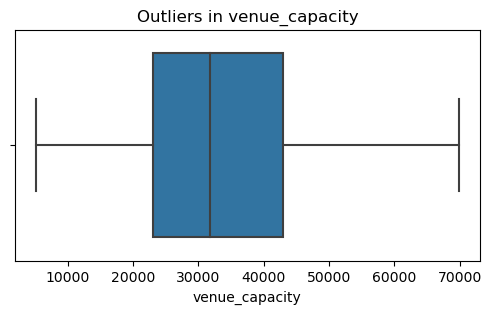

ticket_price: 0 outliers


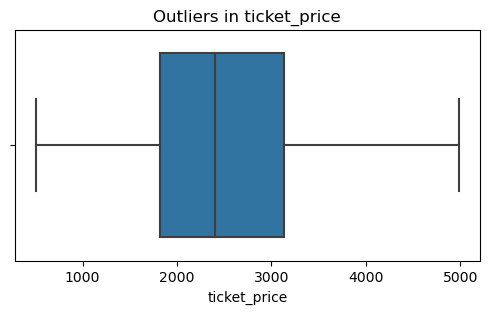

is_holiday: 0 outliers


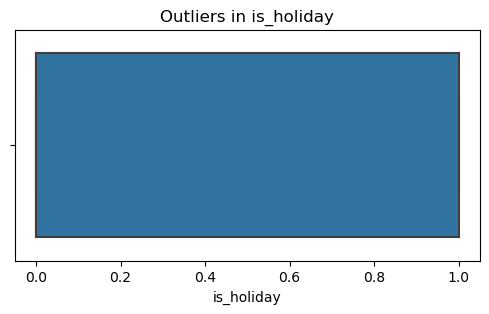

is_weekend: 0 outliers


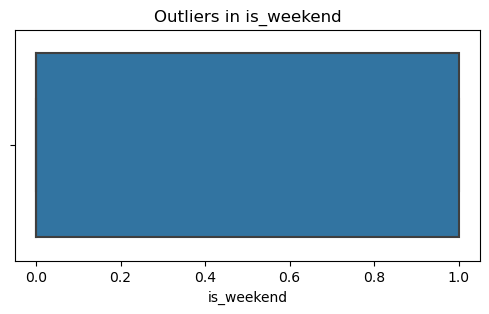

avg_past_attendance: 0 outliers


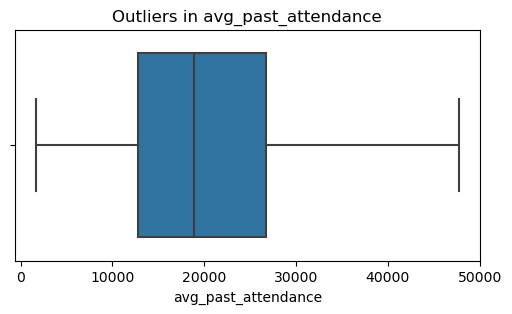

actual_attend: 0 outliers


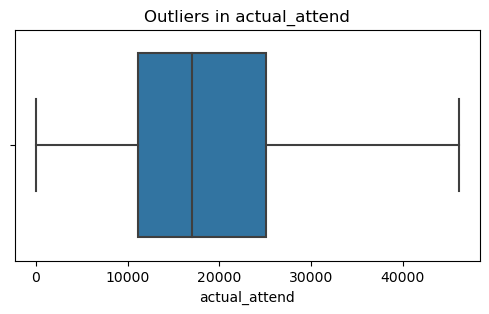

In [49]:
for col in num.columns:
    outliers(col)

In [50]:
df.head()

,event_type,sub_event_type,venue_city,venue_capacity,season,weather,ticket_price,weekday,month,is_holiday,is_weekend,avg_past_attendance,actual_attend
0,traditional events,dussehra,bengaluru,27576,rainy,windy,2067,tuesday,september,0,0,21179.0,21251.0
1,sports,tennis,delhi,35574,rainy,sunny,3396,monday,january,0,0,32830.0,27473.0
2,sports,basketball,bengaluru,35382,winter,cloudy,1845,wednesday,february,0,0,18847.0,14549.0
3,sports,cricket,chennai,35605,autumn,sunny,4709,sunday,august,1,1,32300.0,33270.0
4,concert,rally,hyderabad,29019,summer,cloudy,1572,tuesday,september,0,0,8892.0,9161.0


In [51]:
df = df.reset_index(drop=True)

In [52]:
df

,event_type,sub_event_type,venue_city,venue_capacity,season,weather,ticket_price,weekday,month,is_holiday,is_weekend,avg_past_attendance,actual_attend
0,traditional events,dussehra,bengaluru,27576,rainy,windy,2067,tuesday,september,0,0,21179.0,21251.0
1,sports,tennis,delhi,35574,rainy,sunny,3396,monday,january,0,0,32830.0,27473.0
2,sports,basketball,bengaluru,35382,winter,cloudy,1845,wednesday,february,0,0,18847.0,14549.0
3,sports,cricket,chennai,35605,autumn,sunny,4709,sunday,august,1,1,32300.0,33270.0
4,concert,rally,hyderabad,29019,summer,cloudy,1572,tuesday,september,0,0,8892.0,9161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48495,sports,cricket,chennai,42906,winter,sunny,1371,saturday,january,1,1,17383.0,13956.0
48496,sports,football,chennai,14653,winter,windy,2725,monday,june,0,0,13920.0,10221.0
48497,traditional events,vinayaka chavithi,bengaluru,15943,winter,windy,2146,friday,november,0,0,8834.0,8723.0
48498,sports,badminton,hyderabad,42314,summer,sunny,2061,sunday,may,1,1,36053.0,33791.0


## Dividing Target Column

In [53]:
df['avg_past_attendance'] = df['avg_past_attendance'].astype(int)
df['actual_attend'] = df['actual_attend'].astype(int)

In [54]:
df

,event_type,sub_event_type,venue_city,venue_capacity,season,weather,ticket_price,weekday,month,is_holiday,is_weekend,avg_past_attendance,actual_attend
0,traditional events,dussehra,bengaluru,27576,rainy,windy,2067,tuesday,september,0,0,21179,21251
1,sports,tennis,delhi,35574,rainy,sunny,3396,monday,january,0,0,32830,27473
2,sports,basketball,bengaluru,35382,winter,cloudy,1845,wednesday,february,0,0,18847,14549
3,sports,cricket,chennai,35605,autumn,sunny,4709,sunday,august,1,1,32300,33270
4,concert,rally,hyderabad,29019,summer,cloudy,1572,tuesday,september,0,0,8892,9161
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48495,sports,cricket,chennai,42906,winter,sunny,1371,saturday,january,1,1,17383,13956
48496,sports,football,chennai,14653,winter,windy,2725,monday,june,0,0,13920,10221
48497,traditional events,vinayaka chavithi,bengaluru,15943,winter,windy,2146,friday,november,0,0,8834,8723
48498,sports,badminton,hyderabad,42314,summer,sunny,2061,sunday,may,1,1,36053,33791


In [104]:
X = df.drop('actual_attend', axis=1)
y = df['actual_attend']

In [105]:
X.select_dtypes(include='O')

,event_type,sub_event_type,venue_city,season,weather,weekday,month
0,traditional events,dussehra,bengaluru,rainy,windy,tuesday,september
1,sports,tennis,delhi,rainy,sunny,monday,january
2,sports,basketball,bengaluru,winter,cloudy,wednesday,february
3,sports,cricket,chennai,autumn,sunny,sunday,august
4,concert,rally,hyderabad,summer,cloudy,tuesday,september
...,...,...,...,...,...,...,...
48495,sports,cricket,chennai,winter,sunny,saturday,january
48496,sports,football,chennai,winter,windy,monday,june
48497,traditional events,vinayaka chavithi,bengaluru,winter,windy,friday,november
48498,sports,badminton,hyderabad,summer,sunny,sunday,may


In [106]:
# Library

from sklearn.preprocessing import OneHotEncoder

# Define Object

ohe = OneHotEncoder(handle_unknown='ignore')

# handle_unknown=ignore -> future classes will be ignored
# drop=first -> is another param for dummy variable trap

In [107]:
# Using fit_transform method to convert column data into onehot encodings

ohedata = ohe.fit_transform(X[['event_type','sub_event_type','venue_city','season','weather','weekday','month']]).toarray() # converting data to array

# Once fit_transform is done , ohe is a trained object, where combinations will be remembered for future

In [108]:
ohedata

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [109]:
# Converting ohedata to dataframe

ohedata = pd.DataFrame(ohedata, columns=ohe.get_feature_names_out())

In [110]:
ohedata.head()

,event_type_concert,event_type_fashion show,event_type_political,event_type_prerelease,event_type_sports,event_type_traditional events,sub_event_type_badminton,sub_event_type_basketball,sub_event_type_classical,sub_event_type_cricket,...,month_december,month_february,month_january,month_july,month_june,month_march,month_may,month_november,month_october,month_september
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [111]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cols_to_scale = ['venue_capacity', 'ticket_price', 'avg_past_attendance']

scaled_df = pd.DataFrame(
    scaler.fit_transform(X[cols_to_scale]),
    columns=cols_to_scale
)


In [112]:
scaled_df

,venue_capacity,ticket_price,avg_past_attendance
0,0.346702,0.348593,0.423670
1,0.470311,0.645377,0.676859
2,0.467344,0.299017,0.372993
3,0.470790,0.938589,0.665341
4,0.369003,0.238053,0.156659
...,...,...,...
48495,0.583627,0.193167,0.341178
48496,0.146977,0.495534,0.265923
48497,0.166914,0.366235,0.155399
48498,0.574478,0.347253,0.746898


In [113]:
normal_df=df[['is_holiday','is_weekend']]

In [114]:
X=pd.concat([scaled_df,normal_df,ohedata],axis=1)

In [115]:
X

,venue_capacity,ticket_price,avg_past_attendance,is_holiday,is_weekend,event_type_concert,event_type_fashion show,event_type_political,event_type_prerelease,event_type_sports,...,month_december,month_february,month_january,month_july,month_june,month_march,month_may,month_november,month_october,month_september
0,0.346702,0.348593,0.423670,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.470311,0.645377,0.676859,0,0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.467344,0.299017,0.372993,0,0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.470790,0.938589,0.665341,1,1,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.369003,0.238053,0.156659,0,0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48495,0.583627,0.193167,0.341178,1,1,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48496,0.146977,0.495534,0.265923,0,0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
48497,0.166914,0.366235,0.155399,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48498,0.574478,0.347253,0.746898,1,1,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Train_Test Splitting

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training and Evaluation

## Linear Model Creation & Fitting

In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Predict on Test Set

In [118]:
y_pred = model.predict(X_test)

## Evaluation Accuracy

In [119]:
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("R²:", r2)
print("RMSE:", rmse)

R²: 0.9098069870074272
RMSE: 3093.174278623522


## Ridge Regression Model Creation, Fitting and Predicting

In [71]:
from sklearn.linear_model import Ridge

r_model = Ridge(alpha=1.0)               # Create
r_model.fit(X_train, y_train)            # Fit
y_pred_r = r_model.predict(X_test)           # Predict

## Evaluation Accuracy

In [72]:
r2_r = r2_score(y_test, y_pred_r)
rmse_r = mean_squared_error(y_test, y_pred_r, squared=False)
print("Ridge Regression R²:", r2_r)
print("Ridge Regression RMSE:", rmse_r)

Ridge Regression R²: 0.9098484566839607
Ridge Regression RMSE: 3092.4630944612254


## Lasso Regression Model Creation, Fitting and Predicting

In [73]:
from sklearn.linear_model import Lasso

l_model = Lasso(alpha=0.001)             # Create
l_model.fit(X_train, y_train)            # Fit
y_pred_l = l_model.predict(X_test)           # Predict

## Evaluation Accuracy

In [74]:
r2_l = r2_score(y_test, y_pred_l)
rmse_l = mean_squared_error(y_test, y_pred_l, squared=False)
print("Lasso Regression R²:", r2_l)
print("Lasso Regression RMSE:", rmse_l)

Lasso Regression R²: 0.9098387531581498
Lasso Regression RMSE: 3092.6295197209533


## Elastic Net Regression Model Creation, Fitting and Predicting

In [75]:
from sklearn.linear_model import ElasticNet

en_model = ElasticNet(alpha=0.001, l1_ratio=0.5)  # Create
en_model.fit(X_train, y_train)                    # Fit
y_pred_en = en_model.predict(X_test)                   # Predict

## Evaluation Accuracy

In [76]:
r2_en = r2_score(y_test, y_pred_en)
rmse_en = mean_squared_error(y_test, y_pred_en, squared=False)
print("Elastic Net Regression R²:", r2_en)
print("Elastic Net RMSE:", rmse_en)

Elastic Net Regression R²: 0.9098624412838193
Elastic Net RMSE: 3092.223228704961


## Polynomial Regression Model Creation, Fitting and Predicting

In [77]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2)             # Create polynomial
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [78]:
poly_model = LinearRegression()                      # Create
poly_model.fit(X_train_poly, y_train)                # Fit
y_pred_poly = poly_model.predict(X_test_poly)               # Predict

## Evaluation Accuracy

In [79]:
r2_poly = r2_score(y_test, y_pred_poly)
rmse_poly = mean_squared_error(y_test, y_pred_poly, squared=False)
print("Polynomial Regression R²:", r2_poly)
print("Polynomial Regression RMSE:", rmse_poly)

Polynomial Regression R²: 0.906348159449547
Polynomial Regression RMSE: 3151.926641108234


## Decision Tree Model Creation, Fitting and Predicting

In [80]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()        # Create
dt_model.fit(X_train, y_train)            # Fit
y_pred_dt = dt_model.predict(X_test)           # Predict

## Evaluation Accuracy

In [81]:
r2_dt = r2_score(y_test, y_pred_dt)
rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)
print("Decision Tree R²:", r2_dt)
print("Decision Tree RMSE:", rmse_dt)

Decision Tree R²: 0.8466510322214249
Decision Tree RMSE: 4033.2799832772776


## Random Forest Model Creation & Fitting

In [120]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, n_estimators=200, random_state=42)

## Predict on Test Set

In [121]:
y_pred_rf = rf_model.predict(X_test)

## Evaluation Accuracy

In [122]:
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
print("Random Forest R²:", r2_rf)
print("Random Forest RMSE:", rmse_rf)

Random Forest R²: 0.9230989990185186
Random Forest RMSE: 2856.169248528811


## Tuning Random Forest

In [85]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

param_dist = {
    'n_estimators': [200, 300, 400, 500],
    'max_depth': [15, 18, 22, 25, None],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt'],   # Best for RF regression
    'bootstrap': [True]
}

rf = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=35,                              # Good for 50k rows
    scoring='neg_root_mean_squared_error',  # RMSE based scoring
    cv=3,
    verbose=2,
    n_jobs=-1
)

In [86]:
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 35 candidates, totalling 105 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=35, n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [15, 18, 22, 25, None],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 3],
                                        'n_estimators': [200, 300, 400, 500]},
                   scoring='neg_root_mean_squared_error', verbose=2)

In [87]:
print("Best Parameters:", random_search.best_params_)
best_rf = random_search.best_estimator_

y_pred_best = best_rf.predict(X_test)

Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}


In [88]:
r2_tunerf = r2_score(y_test, y_pred_best)
rmse_tunerf = mean_squared_error(y_test, y_pred_best, squared=False)

print("Tuned Random Forest R²:", r2_tunerf)
print("Tuned Random Forest RMSE:", rmse_tunerf)

Tuned Random Forest R²: 0.8973933883452332
Tuned Random Forest RMSE: 3299.17699771069


## Gradient Boosting Model Creation, Fitting and Predicting

In [89]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor()    # Create
gb_model.fit(X_train, y_train)            # Fit
y_pred_gb = gb_model.predict(X_test)           # Predict


## Evaluation Accuracy

In [90]:
r2_gb = r2_score(y_test, y_pred_gb)
rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)
print("Gradient Boosting R²:", r2_gb)
print("Gradient Boosting RMSE:", rmse_gb)

Gradient Boosting R²: 0.9223075209640531
Gradient Boosting RMSE: 2870.829710590476


## XGBoost Model Creation, Fitting and Predicting

In [91]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor()                 # Create
xgb_model.fit(X_train, y_train)            # Fit
y_pred_xgb = xgb_model.predict(X_test)           # Predict


## Evaluation Accuracy

In [92]:
r2_xgb = r2_score(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
print("XGBoosting R²:", r2_xgb)
print("XGBoosting RMSE:", rmse_xgb)

XGBoosting R²: 0.9193520545959473
XGBoosting RMSE: 2924.9240759019503


## Support Vector Regression Model Creation, Fitting, Predicting and Evaluating Accuracy

In [93]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create
svr_model = SVR(kernel='rbf', C=50, gamma=0.01, epsilon=0.1)

# Fit
svr_model.fit(X_train_scaled, y_train)

# Predict
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluate
print("SVR R²:", r2_score(y_test, y_pred_svr))
print("SVR RMSE:", mean_squared_error(y_test, y_pred_svr, squared=False))


SVR R²: 0.8324338982276553
SVR RMSE: 4216.101189673839


## K-Nearest Neighbors Regression (KNN) Model Creation, Fitting, Predicting and Evaluating Accuracy

In [95]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Create
knn_model = KNeighborsRegressor(n_neighbors=5)

# Fit
knn_model.fit(X_train, y_train)

# Predict
y_pred_knn = knn_model.predict(X_test)

# Evaluate
r2_knn = r2_score(y_test, y_pred_knn)
rmse_knn = mean_squared_error(y_test, y_pred_knn, squared=False)

print("KNN Regression R²:", r2_knn)
print("KNN Regression RMSE:", rmse_knn)


KNN Regression R²: 0.4400780354537023
KNN Regression RMSE: 7706.934972976658


## Best Model Among All

In [96]:
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error

results = {
    "Model": [
        "Linear Regression", "Ridge Regression", "Lasso Regression", "Elastic Net",
        "Polynomial Regression", "Decision Tree", "Random Forest", "Tuned Random Forest",
        "Gradient Boosting", "XGBoost", "SVR", "KNN Regression"
    ],
    "R² Score": [
        r2, r2_r, r2_l, r2_en,
        r2_poly, r2_dt, r2_rf, r2_tunerf,
        r2_gb, r2_xgb, r2_score(y_test, y_pred_svr), r2_knn
    ],
    "RMSE": [
        rmse, rmse_r, rmse_l, rmse_en,
        rmse_poly, rmse_dt, rmse_rf, rmse_tunerf,
        rmse_gb, rmse_xgb, mean_squared_error(y_test, y_pred_svr, squared=False), rmse_knn
    ]
}

df_results = pd.DataFrame(results)
print(df_results)
print("\n")

# Find best model based on highest R²
best_r2_model = df_results.loc[df_results["R² Score"].idxmax()]

# Find best model based on lowest RMSE
best_rmse_model = df_results.loc[df_results["RMSE"].idxmin()]

print("📌 Best Model Based on R² Score:")
print(best_r2_model)

print("\n📌 Best Model Based on RMSE:")
print(best_rmse_model)

                    Model  R² Score         RMSE
0       Linear Regression  0.909807  3093.174279
1        Ridge Regression  0.909848  3092.463094
2        Lasso Regression  0.909839  3092.629520
3             Elastic Net  0.909862  3092.223229
4   Polynomial Regression  0.906348  3151.926641
5           Decision Tree  0.846651  4033.279983
6           Random Forest  0.923099  2856.169249
7     Tuned Random Forest  0.897393  3299.176998
8       Gradient Boosting  0.922308  2870.829711
9                 XGBoost  0.919352  2924.924076
10                    SVR  0.832434  4216.101190
11         KNN Regression  0.440078  7706.934973


📌 Best Model Based on R² Score:
Model       Random Forest
R² Score         0.923099
RMSE          2856.169249
Name: 6, dtype: object

📌 Best Model Based on RMSE:
Model       Random Forest
R² Score         0.923099
RMSE          2856.169249
Name: 6, dtype: object


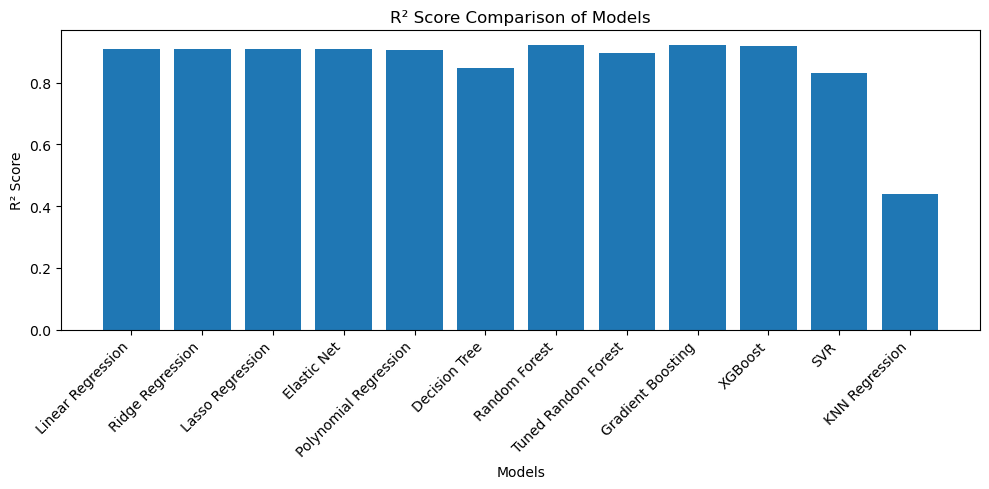

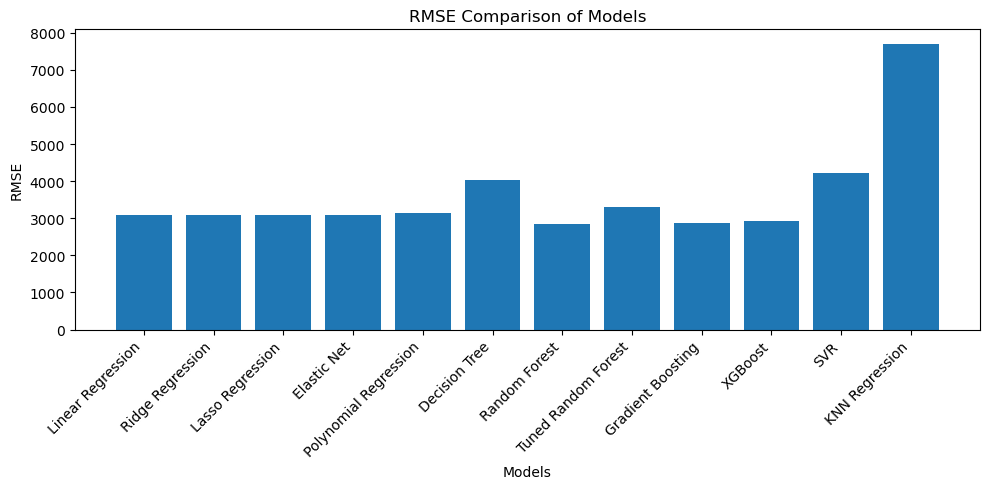

In [97]:
import matplotlib.pyplot as plt

# Plot R² Scores
plt.figure(figsize=(10, 5))
plt.bar(df_results["Model"], df_results["R² Score"])
plt.xticks(rotation=45, ha='right')
plt.title("R² Score Comparison of Models")
plt.xlabel("Models")
plt.ylabel("R² Score")
plt.tight_layout()
plt.show()

# Plot RMSE
plt.figure(figsize=(10, 5))
plt.bar(df_results["Model"], df_results["RMSE"])
plt.xticks(rotation=45, ha='right')
plt.title("RMSE Comparison of Models")
plt.xlabel("Models")
plt.ylabel("RMSE")
plt.tight_layout()
plt.show()

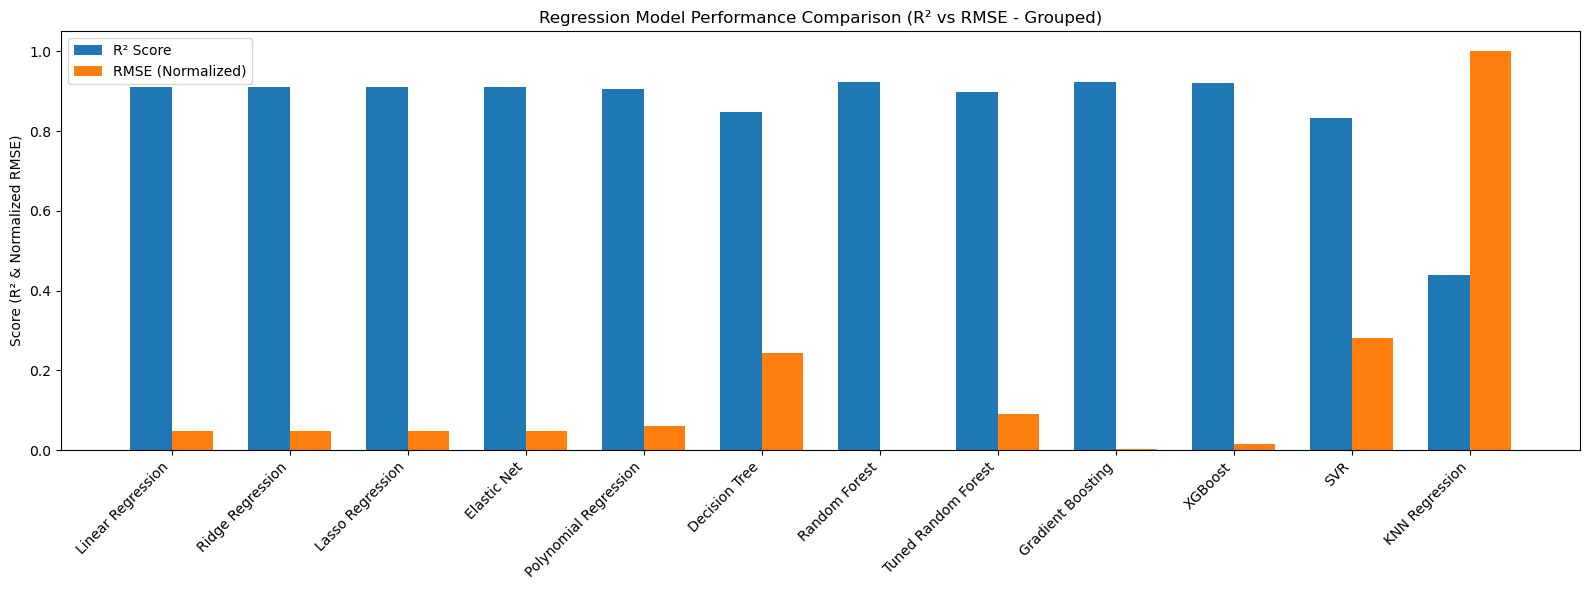

In [98]:
import numpy as np
import matplotlib.pyplot as plt

# Extract values
models = df_results["Model"]
r2_scores = df_results["R² Score"]
rmse_scores = df_results["RMSE"]

# Normalize RMSE to 0–1 scale for fair visual comparison
rmse_norm = (rmse_scores - rmse_scores.min()) / (rmse_scores.max() - rmse_scores.min())

x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(16, 6))

# Plot bars
plt.bar(x - width/2, r2_scores, width, label='R² Score')
plt.bar(x + width/2, rmse_norm, width, label='RMSE (Normalized)')

plt.xticks(x, models, rotation=45, ha='right')
plt.ylabel("Score (R² & Normalized RMSE)")
plt.title("Regression Model Performance Comparison (R² vs RMSE - Grouped)")
plt.legend()
plt.tight_layout()
plt.show()


## Saving Model

In [123]:
import os
import joblib

joblib.dump(rf_model, "models/rf_model.pkl")
joblib.dump(ohe, "models/ohe_encoder.pkl")
joblib.dump(scaler, "models/scaler.pkl")

['models/scaler.pkl']

In [124]:
# Load models and preprocessors
import os
import joblib

rf_model = joblib.load("models/rf_model.pkl")
ohe = joblib.load("models/ohe_encoder.pkl")
scaler = joblib.load("models/scaler.pkl")

### Real Time Prediction

In [125]:
# Example new data
new_data = pd.DataFrame({
    'event_type': ['traditional events'],
    'sub_event_type': ['dussehra'],
    'venue_city': ['bengaluru'],
    'venue_capacity': [10200],
    'season': ['rainy'],
    'weather': ['windy'],
    'ticket_price': [120],
    'weekday': ['tuesday'],
    'month': ['september'],
    'is_holiday':[0],
    'is_weekend':[0],
    'avg_past_attendance': [13334]
})

# Separate categorical and numerical columns
categorical_cols = ['event_type', 'sub_event_type', 'venue_city', 'season', 'weather', 'weekday', 'month']
numerical_cols = ['venue_capacity', 'ticket_price','avg_past_attendance']
normal_cols=new_data[['is_holiday', 'is_weekend']]


In [126]:
cat_encoded = ohe.transform(new_data[categorical_cols])
cat_encoded_df = pd.DataFrame(cat_encoded.toarray(), columns=ohe.get_feature_names_out(categorical_cols))


In [127]:
num_scaled = scaler.transform(new_data[numerical_cols])
num_scaled_df = pd.DataFrame(num_scaled, columns=numerical_cols)

In [128]:
X_new = pd.concat([num_scaled_df, normal_cols, cat_encoded_df], axis=1)


In [129]:
# Using Random Forest
pred_rf = rf_model.predict(X_new)

print("Random forest Prediction:", pred_rf)

Random forest Prediction: [12903.56431999]


## DeathCount

In [136]:
city = new_data['venue_city'][0].strip().lower()
sub_event = new_data['sub_event_type'][0].strip().lower()

filtered_df = raw[
    (raw['venue_city'].str.lower() == city) &
    (raw['sub_event_type'].str.lower() == sub_event) &
    (raw['death_count'] >= 1)
]
if not filtered_df.empty:
    total_deaths = filtered_df['death_count'].sum()
    count_records = filtered_df.shape[0]
    print(f"Total death count recorded in {city.title()} for {sub_event.title()}: {total_deaths} (in {count_records} incidents)")
else:
    print(f"No historical death record found in {city.title()} for {sub_event.title()}")


Total death count recorded in Bengaluru for Dussehra: 825 (in 357 incidents)


In [138]:
raw[(raw["death_count"]>=1) & (raw["venue_city"]=="Bengaluru") & (raw["sub_event_type"]=="Dussehra")]

,event_id,event_type,sub_event_type,venue_city,venue_capacity,event_date,season,ticket_price,avg_past_attendance,weather,death_count,actual_attend,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,33554,Traditional Events,Dussehra,Bengaluru,27576,26-09-2023,Rainy,2067.0,21179.0,Windy,1,21251.0,NaN,NaN,NaN
30,36481,Traditional Events,Dussehra,Bengaluru,11014,11-03-2022,Rainy,2317.0,6992.0,Cloudy,1,6016.0,NaN,NaN,NaN
122,33705,Traditional Events,Dussehra,Bengaluru,35233,07-11-2023,Summer,3192.0,20639.0,Rainy,3,22570.0,NaN,NaN,NaN
338,34080,Traditional Events,Dussehra,Bengaluru,44421,16-12-2024,Summer,1069.0,14817.0,Cloudy,3,11153.0,NaN,NaN,NaN
356,34166,Traditional Events,Dussehra,Bengaluru,27348,11-08-2024,Rainy,2122.0,22181.0,Sunny,2,20734.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49362,37498,Traditional Events,Dussehra,Bengaluru,37664,28-04-2024,Autumn,NaN,33065.0,Cloudy,1,24707.0,NaN,NaN,NaN
49381,32308,Traditional Events,Dussehra,Bengaluru,12785,08-02-2023,Summer,1759.0,9760.0,Cloudy,1,10101.0,NaN,NaN,NaN
49769,34699,Traditional Events,Dussehra,Bengaluru,12955,27-07-2023,Rainy,3092.0,6968.0,Rainy,1,5749.0,NaN,NaN,NaN
49865,33271,Traditional Events,Dussehra,Bengaluru,49440,04-06-2023,Summer,4026.0,19595.0,Cloudy,6,14768.0,NaN,NaN,NaN


In [139]:
!pip freeze > requirements.txt